## Connect with KP

---

### [GitHub](https://github.com/PrinceKhunt16)
### [LinkedIn](https://www.linkedin.com/in/prince-khunt-linked-in/)
### [TwittEr](https://x.com/princekhunt19)
### [KaGGle](https://www.kaggle.com/princekhunt19)

---

# 1. Loading Libraries and Data

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sweetviz as sv
import torch
import torch.nn as nn
import torch.optim as optim
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [3]:
df = pd.read_csv('data.csv') 

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 2. Starting to Cleaning and Reading Data

In [5]:
report = sv.analyze(df)
report.show_html('report.html')

                                             |      | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:
def details_about_df(dataframe):
    print("##### Shape")
    print(dataframe.shape)
    print('##### DataTypes')
    print(dataframe.dtypes)
    print("##### Columns")
    print(dataframe.columns)
    print("##### Index")
    print(dataframe.index)
    print("##### NA")
    print(dataframe.isnull().values.any())
    print("##### NA Sum - Ratio")
    print(pd.DataFrame({"na_sum": dataframe.isnull().sum(), "ratio": dataframe.isnull().sum() / dataframe.shape[0]}))
    print("##### Quantiles")
    print(dataframe.describe().T)

details_about_df(df)

##### Shape
(7043, 21)
##### DataTypes
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
##### Columns
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharge

In [7]:
df.drop('customerID', axis=1, inplace=True)

In [8]:
# Capturing numerical and categorical data

def fetch_col_names(dataframe):
    # Categorical columns: columns with object dtype
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'O']

    # Numerical columns: columns with non-object dtype
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    return cat_cols, num_cols

cat_cols, num_cols = fetch_col_names(df)

In [9]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [10]:
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [11]:
df[cat_cols]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [12]:
df[num_cols]

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
df['SeniorCitizen'] = pd.Categorical(df['SeniorCitizen'], categories=[0, 1], ordered=False)
df['SeniorCitizen'] = df['SeniorCitizen'].cat.rename_categories({0: 'No', 1: 'Yes'})
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [15]:
cat_cols, num_cols = fetch_col_names(df)

In [16]:
df[cat_cols]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,No,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [17]:
df[num_cols]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


# 3. Categorical Variable

In [18]:
def cat_details(dataframe, col_name, plot=False):
    # Count and ratio of unique values
    value_counts = dataframe[col_name].value_counts()
    ratio = 100 * value_counts / len(dataframe)
    
    # Calculate the length of the summary line
    summary_length = len(col_name) + len(" Details ")
    border_length = max(50, summary_length + 4)
    
    # Create border lines
    top_border = '#' * border_length
    middle_border = f"{'#' * 10} {col_name} Details {'#' * 10}".center(border_length, '#')
    bottom_border = '#' * border_length

    # Print summary
    print(f"\n{top_border}")
    print(middle_border)
    print(pd.DataFrame({col_name: value_counts, "Ratio (%)": ratio}))
    print(f"\n{col_name} has {dataframe[col_name].nunique()} unique values.")
    print(f"{bottom_border}\n")
    
    # Plot count plot if plot is True
    if plot:
        plt.figure(figsize=(10, 6))
        plt.bar(value_counts.index, value_counts.values)
        plt.title(f"Count Plot for {col_name}")
        plt.xlabel(col_name)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()


##################################################
################# gender Details #################
        gender  Ratio (%)
gender                   
Male      3555   50.47565
Female    3488   49.52435

gender has 2 unique values.
##################################################



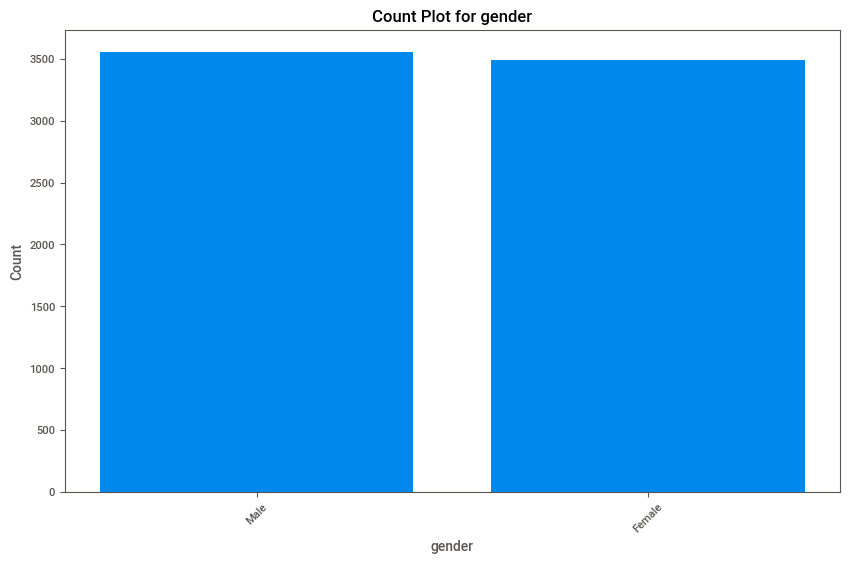


##################################################
############# SeniorCitizen Details ##############
               SeniorCitizen  Ratio (%)
SeniorCitizen                          
No                      5901  83.785319
Yes                     1142  16.214681

SeniorCitizen has 2 unique values.
##################################################



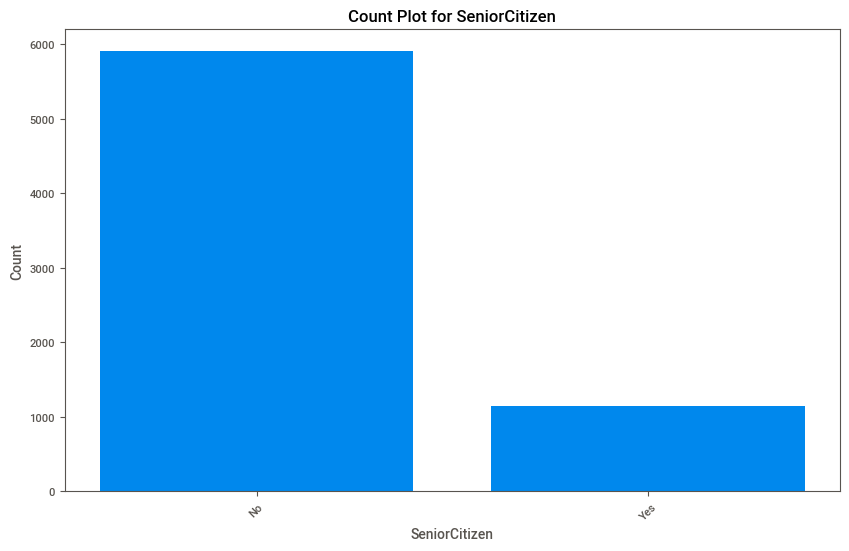


##################################################
################ Partner Details #################
         Partner  Ratio (%)
Partner                    
No          3641   51.69672
Yes         3402   48.30328

Partner has 2 unique values.
##################################################



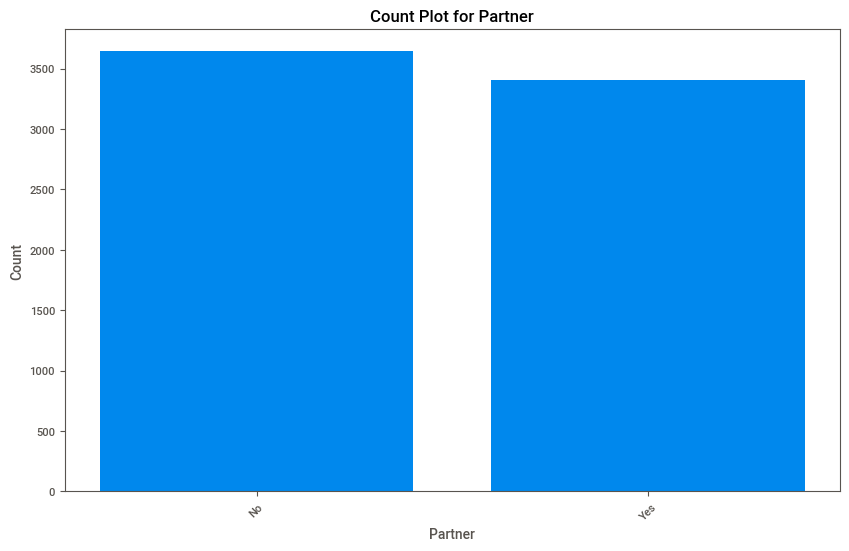


##################################################
############### Dependents Details ###############
            Dependents  Ratio (%)
Dependents                       
No                4933  70.041176
Yes               2110  29.958824

Dependents has 2 unique values.
##################################################



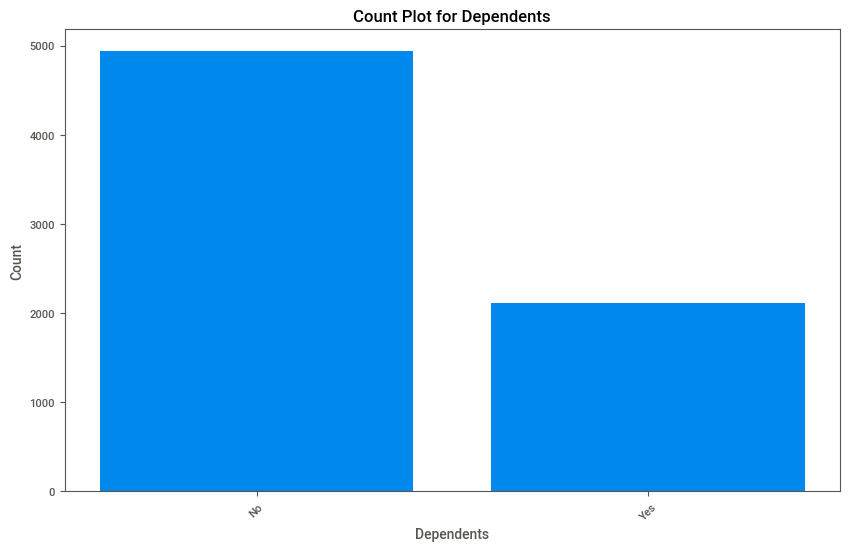


##################################################
############## PhoneService Details ##############
              PhoneService  Ratio (%)
PhoneService                         
Yes                   6361  90.316626
No                     682   9.683374

PhoneService has 2 unique values.
##################################################



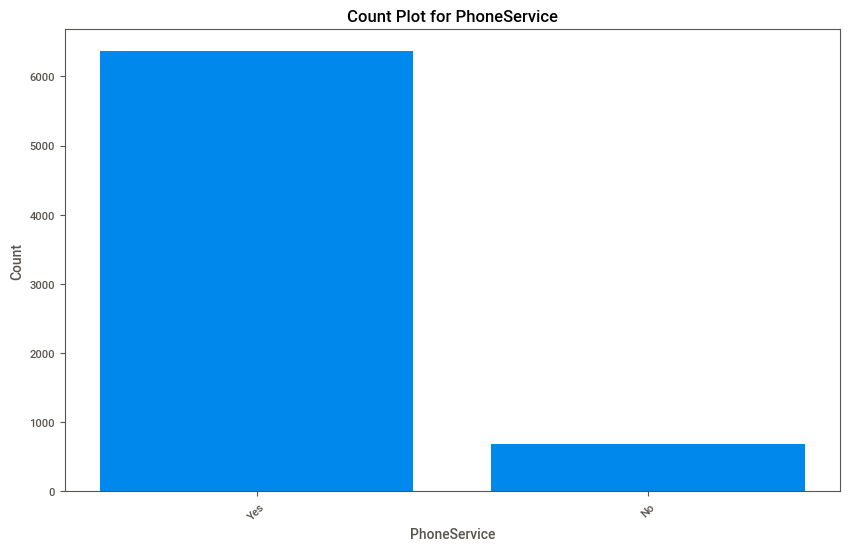


##################################################
############# MultipleLines Details ##############
                  MultipleLines  Ratio (%)
MultipleLines                             
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374

MultipleLines has 3 unique values.
##################################################



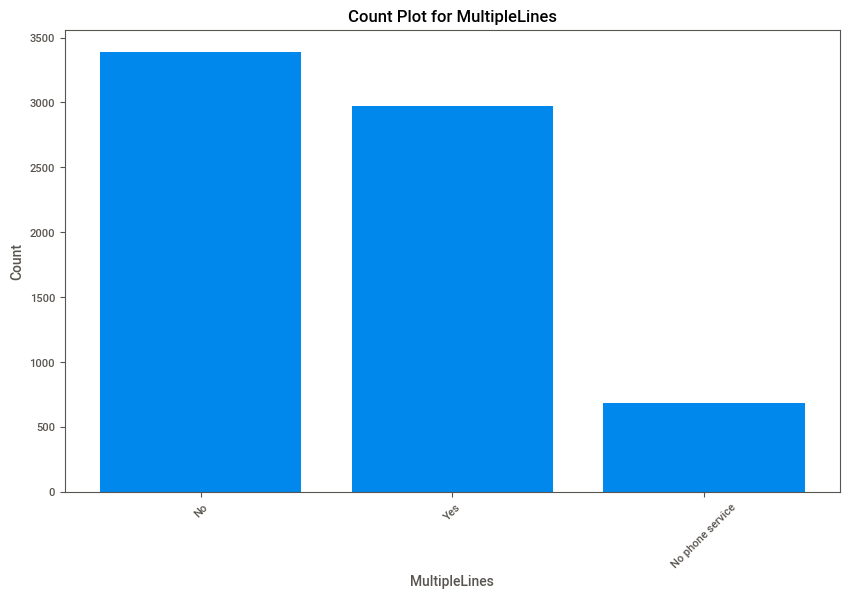


##################################################
############ InternetService Details #############
                 InternetService  Ratio (%)
InternetService                            
Fiber optic                 3096  43.958540
DSL                         2421  34.374556
No                          1526  21.666903

InternetService has 3 unique values.
##################################################



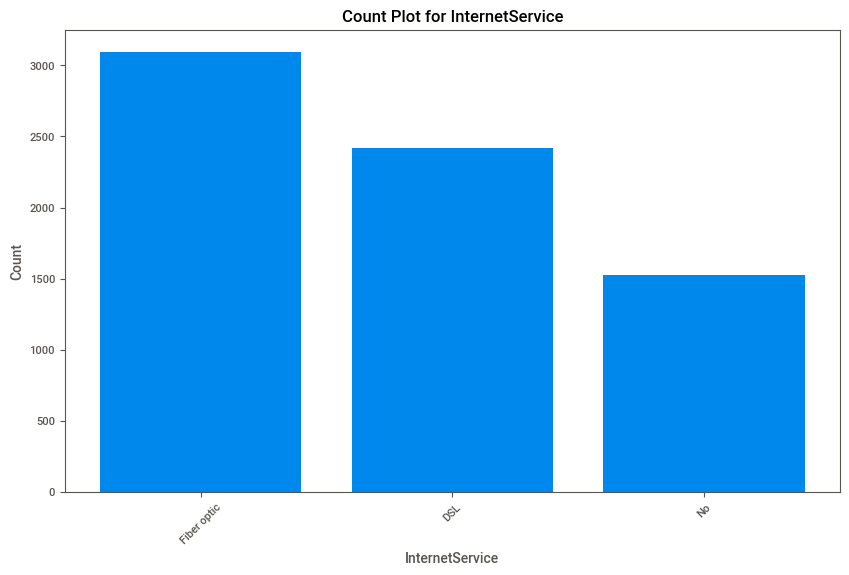


##################################################
############# OnlineSecurity Details #############
                     OnlineSecurity  Ratio (%)
OnlineSecurity                                
No                             3498  49.666335
Yes                            2019  28.666761
No internet service            1526  21.666903

OnlineSecurity has 3 unique values.
##################################################



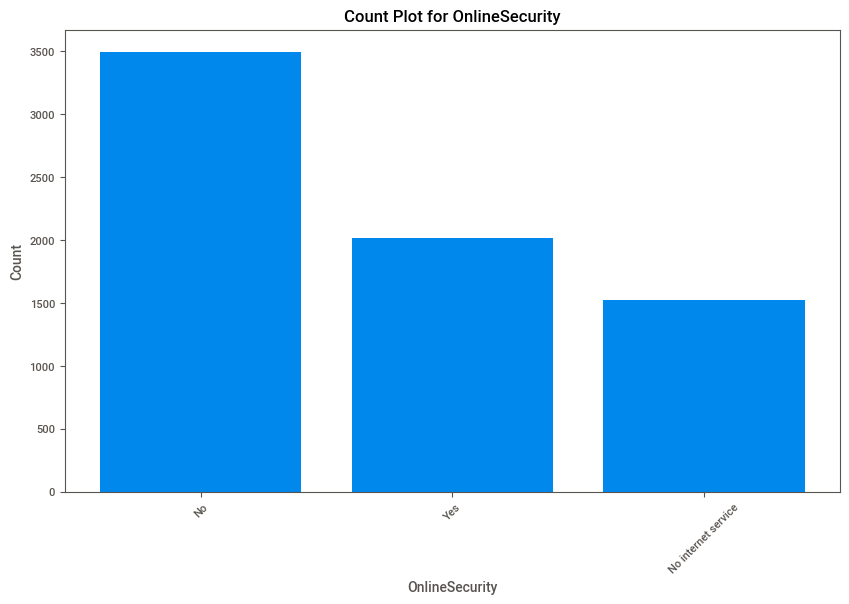


##################################################
############## OnlineBackup Details ##############
                     OnlineBackup  Ratio (%)
OnlineBackup                                
No                           3088  43.844952
Yes                          2429  34.488144
No internet service          1526  21.666903

OnlineBackup has 3 unique values.
##################################################



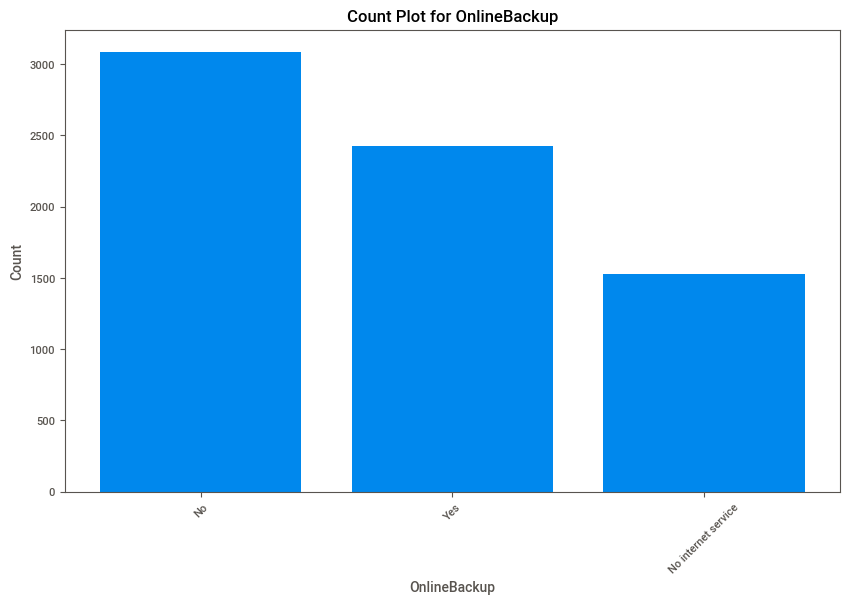


##################################################
############ DeviceProtection Details ############
                     DeviceProtection  Ratio (%)
DeviceProtection                                
No                               3095  43.944342
Yes                              2422  34.388755
No internet service              1526  21.666903

DeviceProtection has 3 unique values.
##################################################



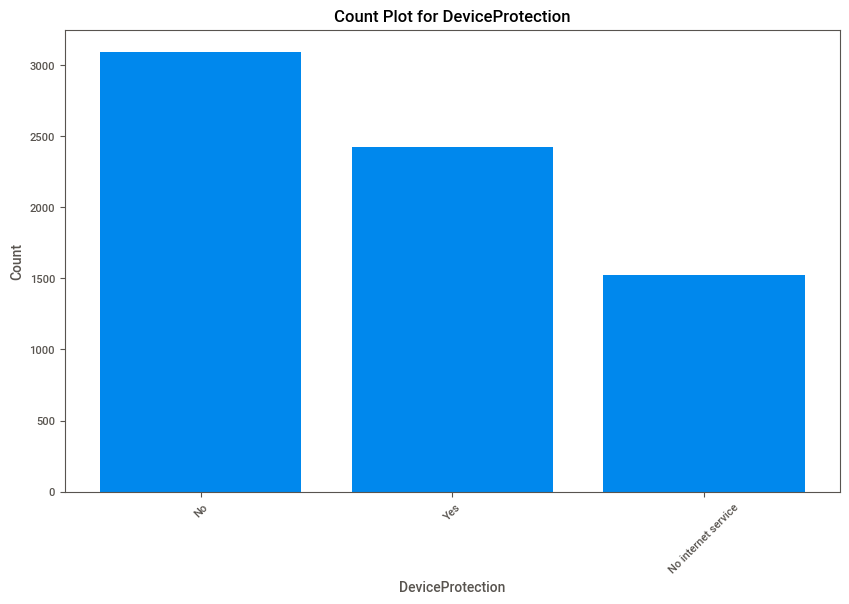


##################################################
############## TechSupport Details ###############
                     TechSupport  Ratio (%)
TechSupport                                
No                          3473  49.311373
Yes                         2044  29.021724
No internet service         1526  21.666903

TechSupport has 3 unique values.
##################################################



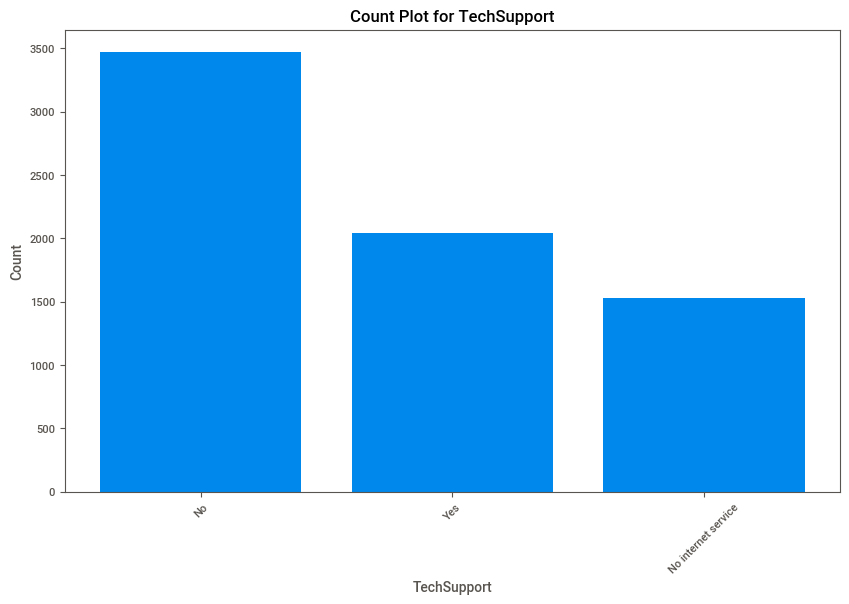


##################################################
############## StreamingTV Details ###############
                     StreamingTV  Ratio (%)
StreamingTV                                
No                          2810  39.897771
Yes                         2707  38.435326
No internet service         1526  21.666903

StreamingTV has 3 unique values.
##################################################



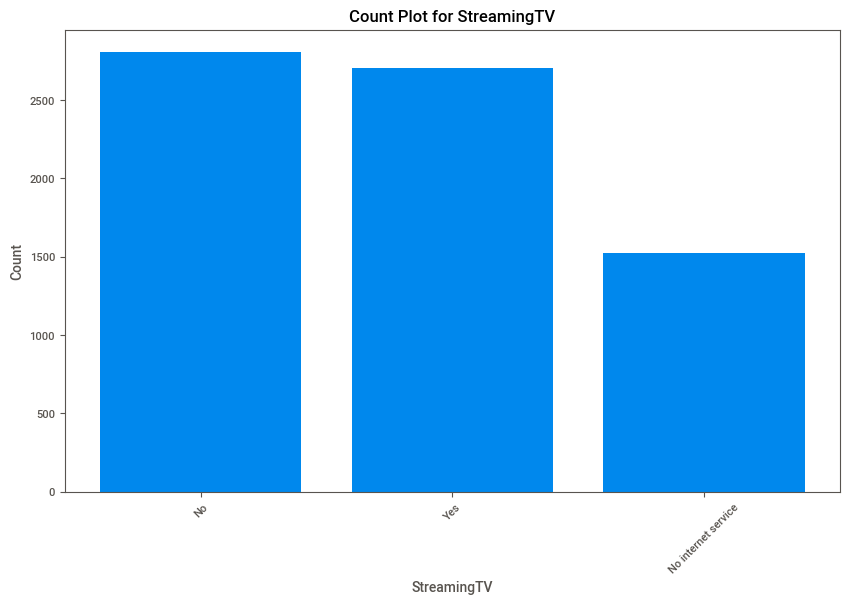


##################################################
############ StreamingMovies Details #############
                     StreamingMovies  Ratio (%)
StreamingMovies                                
No                              2785  39.542808
Yes                             2732  38.790288
No internet service             1526  21.666903

StreamingMovies has 3 unique values.
##################################################



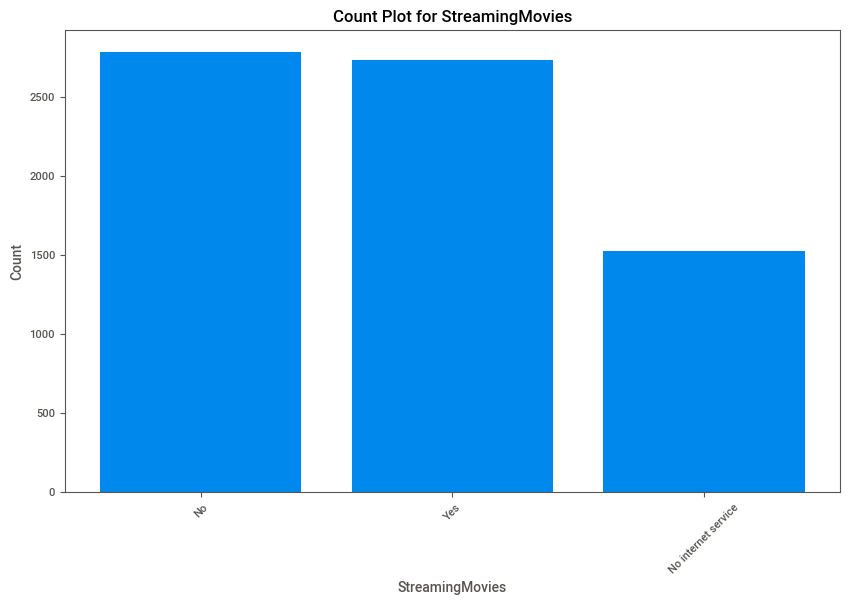


##################################################
################ Contract Details ################
                Contract  Ratio (%)
Contract                           
Month-to-month      3875  55.019168
Two year            1695  24.066449
One year            1473  20.914383

Contract has 3 unique values.
##################################################



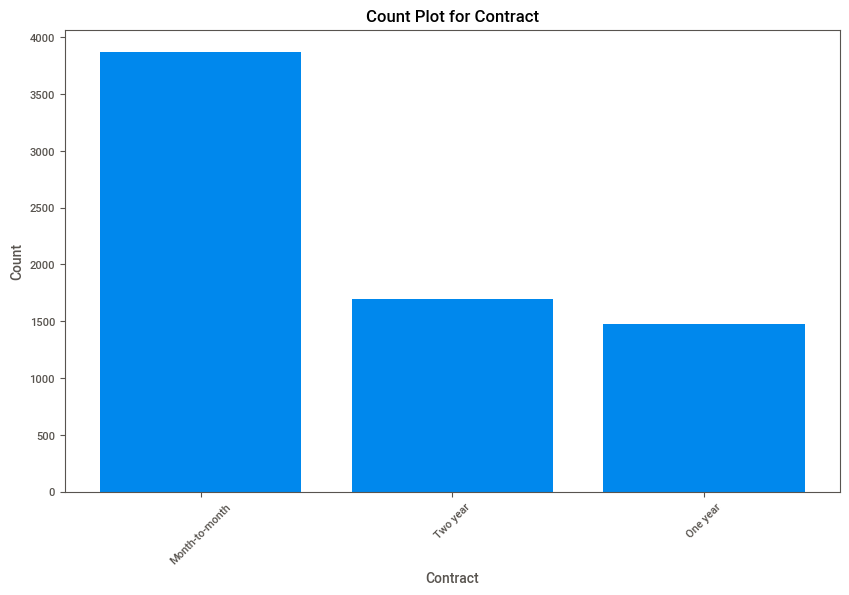


##################################################
############ PaperlessBilling Details ############
                  PaperlessBilling  Ratio (%)
PaperlessBilling                             
Yes                           4171  59.221922
No                            2872  40.778078

PaperlessBilling has 2 unique values.
##################################################



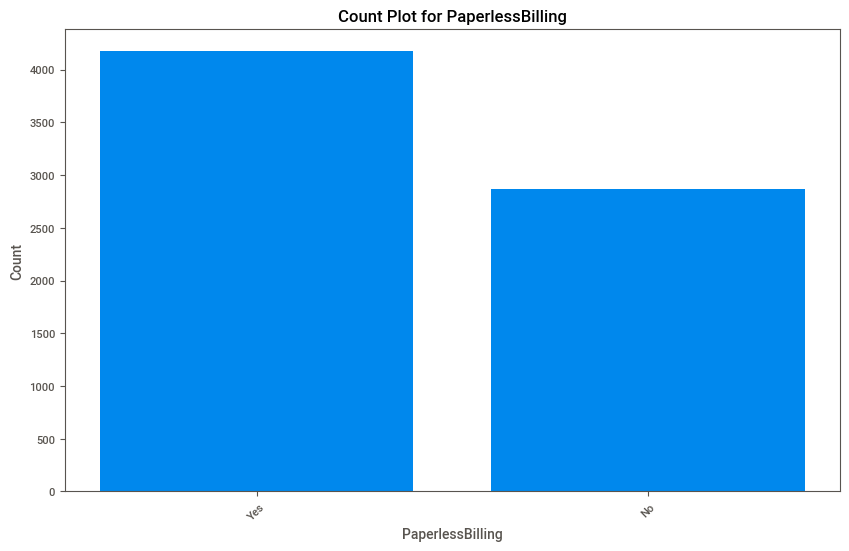


##################################################
############# PaymentMethod Details ##############
                           PaymentMethod  Ratio (%)
PaymentMethod                                      
Electronic check                    2365  33.579441
Mailed check                        1612  22.887974
Bank transfer (automatic)           1544  21.922476
Credit card (automatic)             1522  21.610109

PaymentMethod has 4 unique values.
##################################################



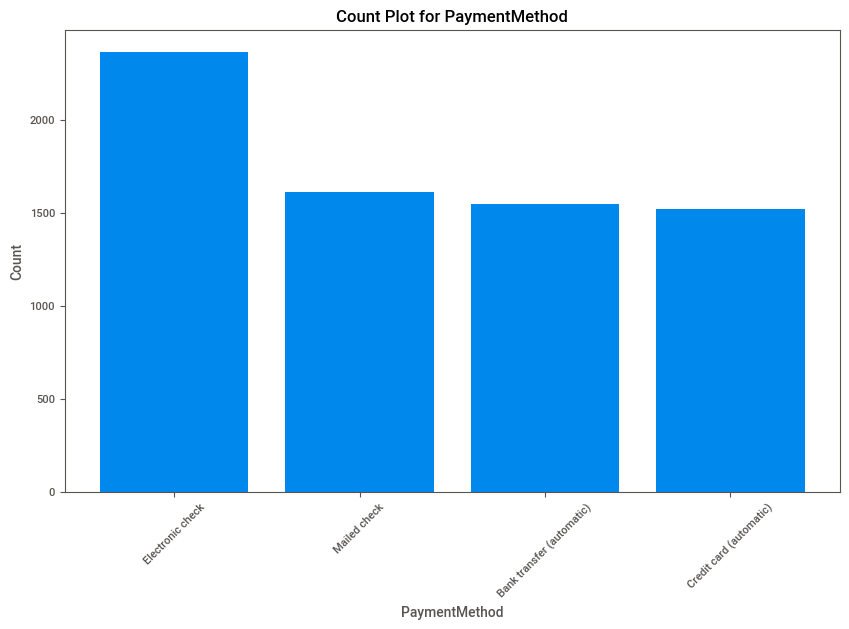


##################################################
################# Churn Details ##################
       Churn  Ratio (%)
Churn                  
No      5174  73.463013
Yes     1869  26.536987

Churn has 2 unique values.
##################################################



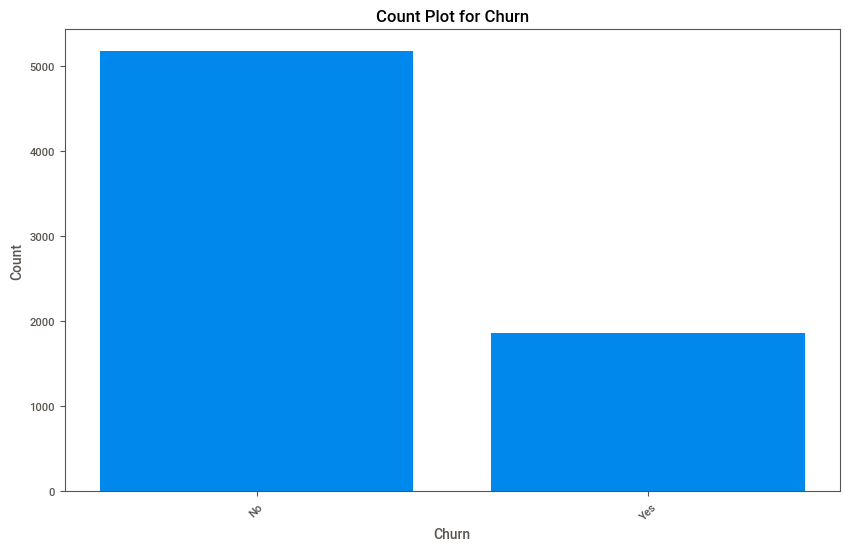

In [19]:
for col in cat_cols:
    cat_details(df, col, plot=True)

# 4. Numerical Variable

In [20]:
def num_details(dataframe, col_name, plot=False, quantiles=[0.05, 0.10, 0.20, 0.50, 0.60, 0.80, 0.90, 0.95, 0.99]):
    if plot:
        dataframe[col_name].hist(bins=20)
        plt.xlabel(col_name)
        plt.title(col_name)
        plt.show(block=True)
    
    # Calculate the length of the summary line
    summary_length = len(col_name) + len(" Details ")
    border_length = max(50, summary_length + 4)
    
    # Create border lines
    top_border = '#' * border_length
    middle_border = f"{'#' * 10} {col_name} Details {'#' * 10}".center(border_length, '#')
    bottom_border = '#' * border_length
    
    # Print summary
    print(f"\n{top_border}")
    print(middle_border)
    print(dataframe[col_name].describe(percentiles=quantiles).T, end="\n\n")
    print(f"{bottom_border}\n")

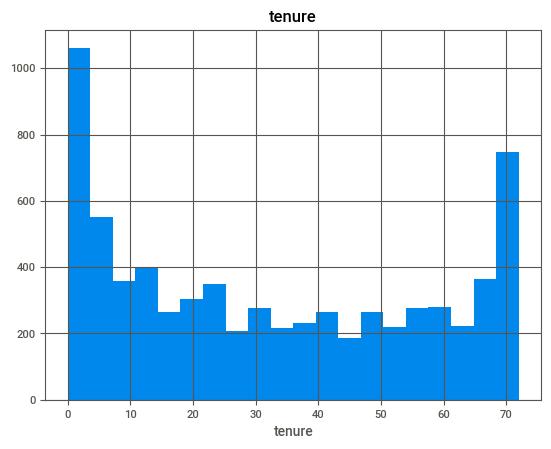


##################################################
################# tenure Details #################
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
5%          1.000000
10%         2.000000
20%         6.000000
50%        29.000000
60%        40.000000
80%        60.000000
90%        69.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64

##################################################



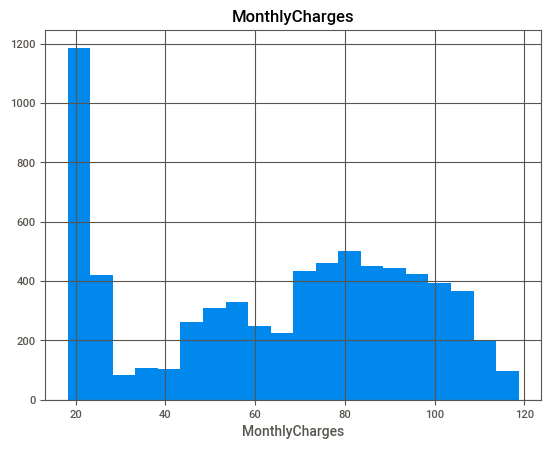


##################################################
############# MonthlyCharges Details #############
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
5%         19.650000
10%        20.050000
20%        25.050000
50%        70.350000
60%        79.100000
80%        94.250000
90%       102.600000
95%       107.400000
99%       114.729000
max       118.750000
Name: MonthlyCharges, dtype: float64

##################################################



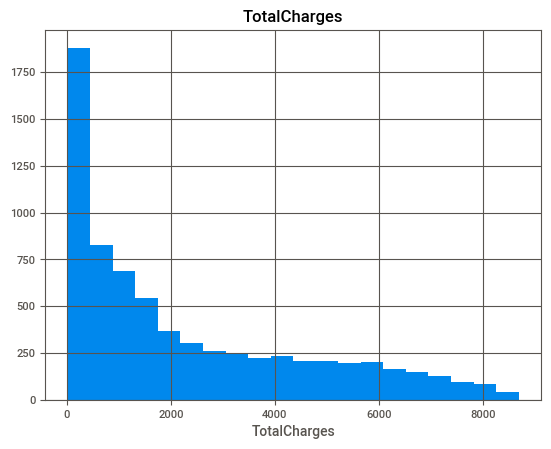


##################################################
############## TotalCharges Details ##############
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
5%         49.605000
10%        84.600000
20%       267.070000
50%      1397.475000
60%      2048.950000
80%      4475.410000
90%      5976.640000
95%      6923.590000
99%      8039.883000
max      8684.800000
Name: TotalCharges, dtype: float64

##################################################



In [21]:
for col in num_cols:
    num_details(df, col, plot=True)

# 5. Outliers

##################### tenure Details ####################


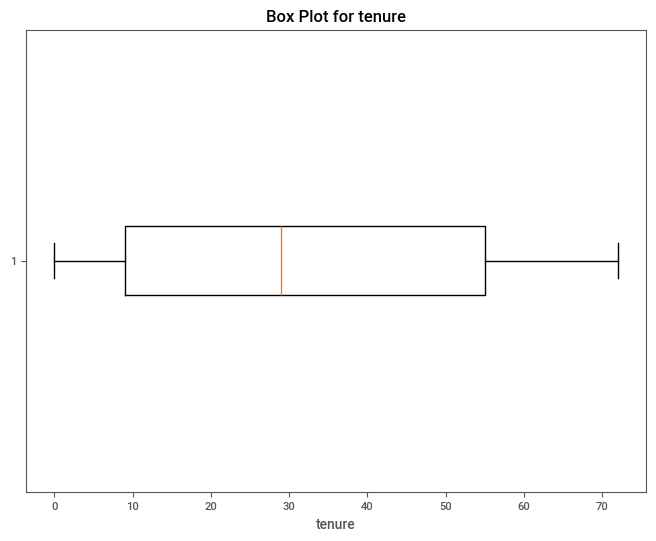

################# MonthlyCharges Details ################


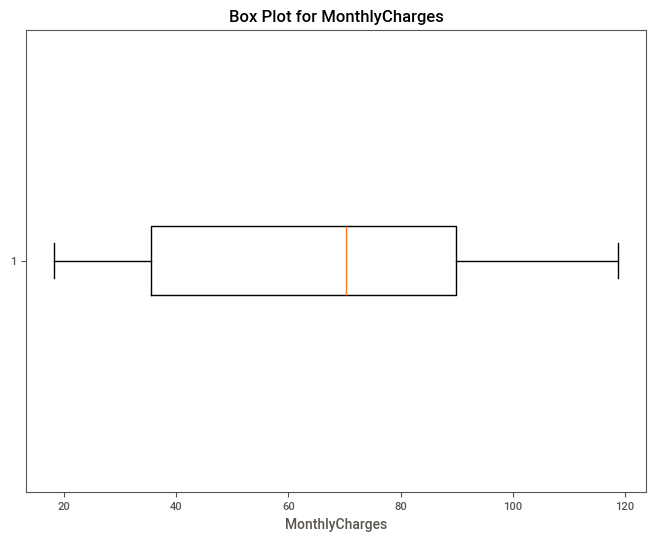

################## TotalCharges Details #################


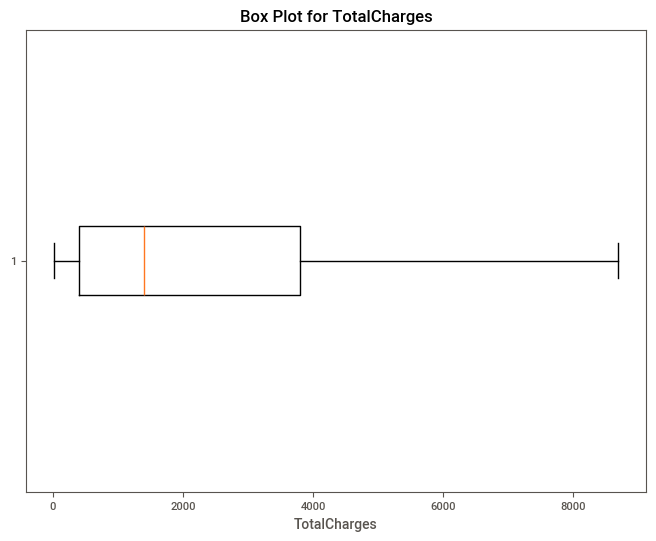

In [22]:
for col in num_cols:
    print(f"{'#' * 10} {col} Details {'#' * 10}".center(57, '#'))
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col].dropna(), vert=False) 
    plt.title(f"Box Plot for {col}")
    plt.xlabel(col)
    plt.show()

In [23]:
def outlier_thresholds(dataframe, col_name, q1=0.01, q3=0.99):
    # Calculate quartiles
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    
    # Calculate interquartile range
    interquantile_range = quartile3 - quartile1
    
    # Calculate outlier thresholds
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    
    return low_limit, up_limit

In [24]:
def check_outlier(dataframe, col_name):
    if pd.api.types.is_numeric_dtype(dataframe[col_name]):
        low, up = outlier_thresholds(dataframe, col_name)
        return (dataframe[col_name] > up) | (dataframe[col_name] < low)
    else:
        return pd.Series(False, index=dataframe.index)

In [25]:
check_outlier(df, num_cols)

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [26]:
def check_all_columns_outliers(dataframe,num_cols):
    results = {}
    
    for col in num_cols:
        results[col] = check_outlier(dataframe, col).any() if pd.api.types.is_numeric_dtype(dataframe[col]) else False
    
    return results

In [27]:
check_all_columns_outliers(df, num_cols)

{'tenure': False, 'MonthlyCharges': False, 'TotalCharges': False}

In [28]:
def show_column_names_with_outliers_info(dataframe, col_list):
    print(f"{'#' * 10} Numeric Columns Outlier Thresholds: Low & Up Limit {'#' * 10}".center(100, '#'))
    for col in col_list:
        low, up = outlier_thresholds(dataframe, col)
        print(f"{col} : low: {low}, up: {up}", end="\n")
    print(end="\n\n")

    # Categorize columns based on outlier presence
    no_outliers = []
    have_outliers = []
    for col, has_outliers in check_all_columns_outliers(dataframe, col_list).items():
        if has_outliers:
            have_outliers.append(col)
        else:
            no_outliers.append(col)

    # Print columns with outliers
    print(f"{'#' * 10} Numeric Columns Have Outliers {'#' * 10}".center(100, '#'))
    print(have_outliers)
    print(f"count_columns: {len(have_outliers)}", end="\n\n")

    # Print columns without outliers
    print(f"{'#' * 10} Numeric Columns Have NOT Outliers {'#' * 10}".center(100, '#'))
    print(no_outliers)
    print(f"count_columns: {len(no_outliers)}", end="\n\n")

    return have_outliers, no_outliers

In [29]:
have_outliers, no_outliers = show_column_names_with_outliers_info(df, num_cols)

######################## Numeric Columns Outlier Thresholds: Low & Up Limit ########################
tenure : low: -105.5, up: 178.5
MonthlyCharges : low: -124.09349999999999, up: 258.0225
TotalCharges : low: -12010.074499999997, up: 20069.857499999995


################################## Numeric Columns Have Outliers ###################################
[]
count_columns: 0

################################ Numeric Columns Have NOT Outliers #################################
['tenure', 'MonthlyCharges', 'TotalCharges']
count_columns: 3



# 6. Correlation

In [30]:
corr = df[num_cols].corr()
corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


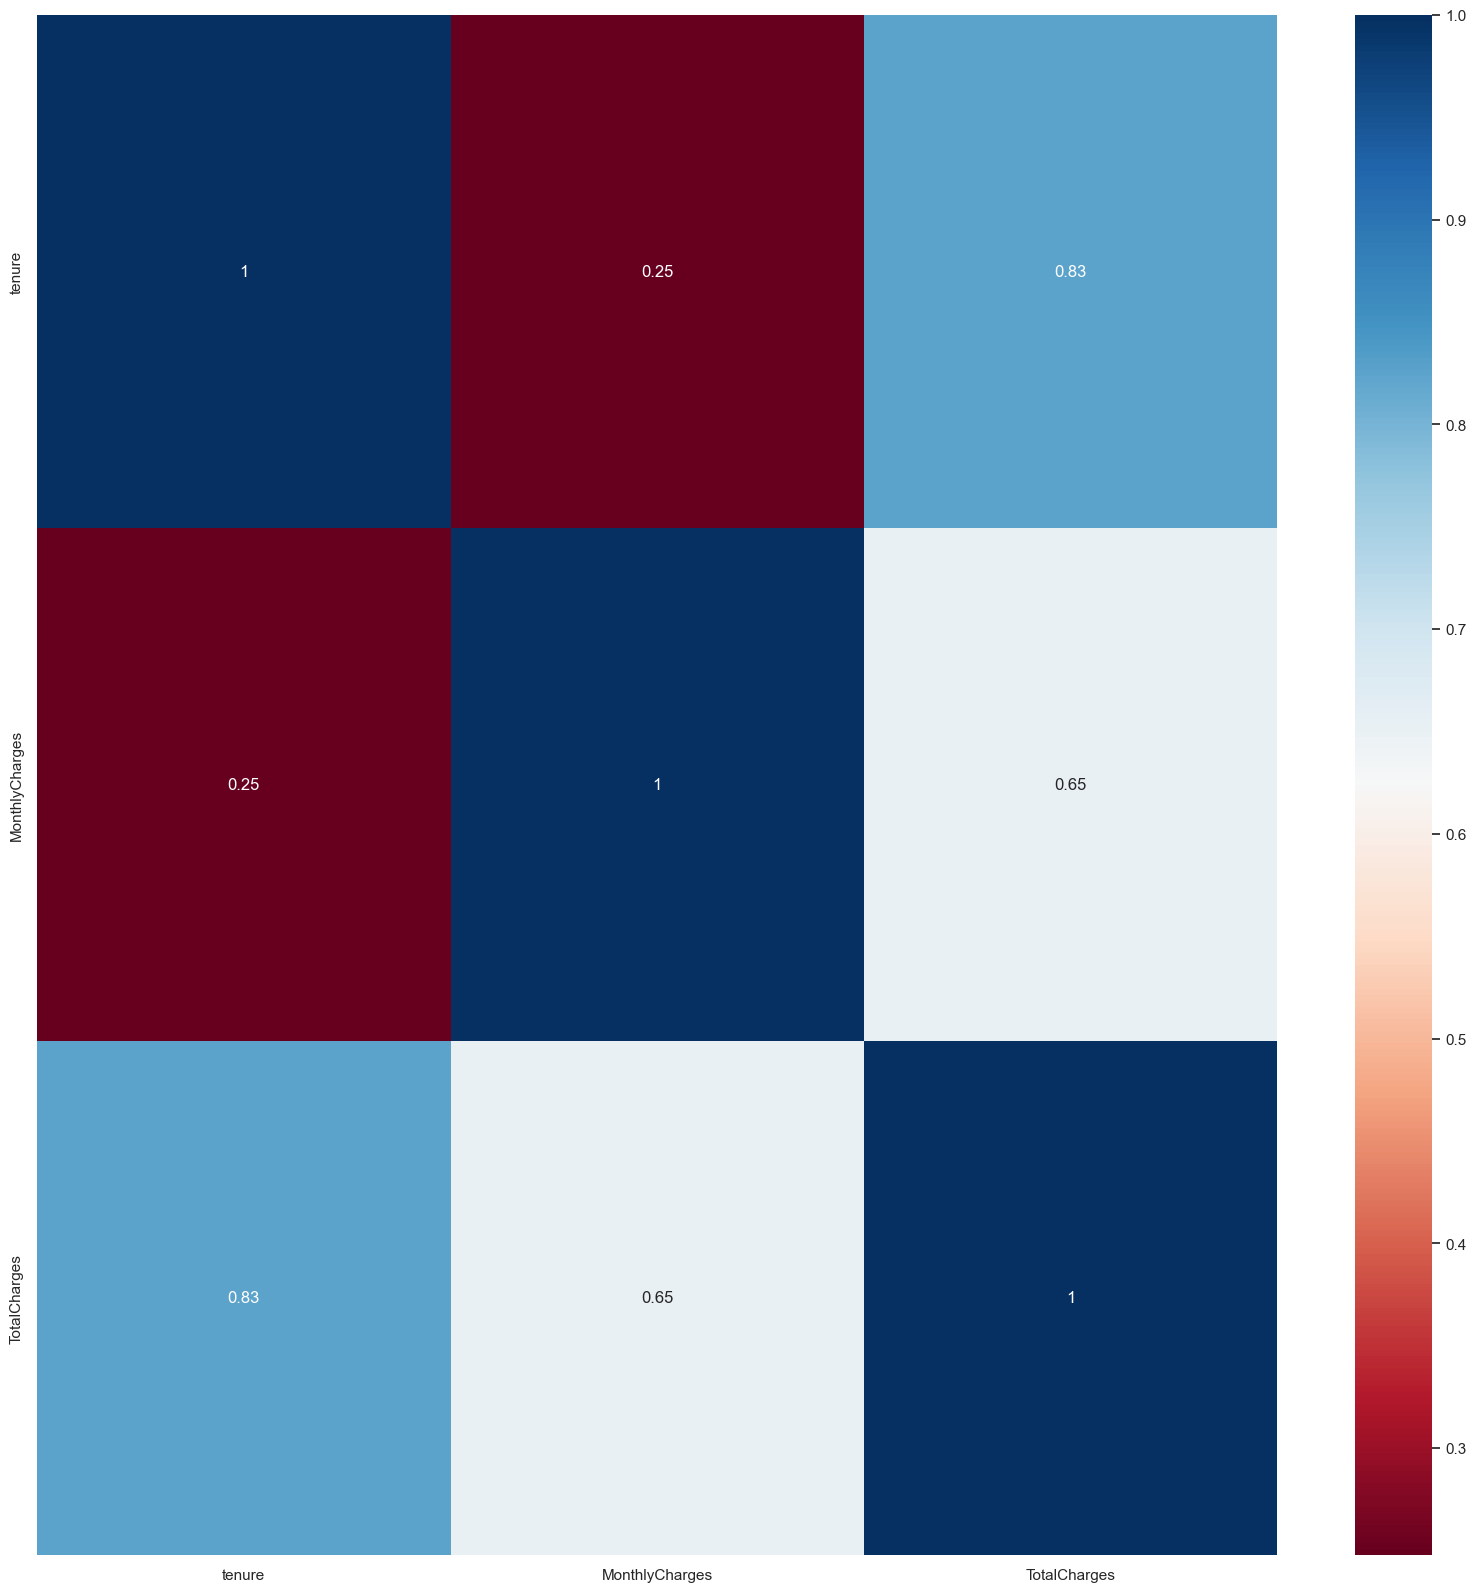

In [31]:
sns.set(rc = {"figure.figsize":(20, 20)})
sns.heatmap(corr, cmap="RdBu", annot=True)
plt.show()

# 7. Missing Values

In [32]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    
    if na_name:
        return na_columns

In [33]:
missing_values_table(df)

              n_miss  ratio
TotalCharges      11   0.16


In [34]:
missing_cols = ['TotalCharges']

In [35]:
# Filling numerical missing values: Age, Fare

def quick_missing_imp(data, num_method="median", cat_length=20, target="Churn"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]
    temp_target = data[target]
    
    print("# Before")
    print(data[variables_with_na].isnull().sum(), "\n\n")
    
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)
    
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)
    
    data[target] = temp_target
    print("# After \nImputation method is 'MODE' for categorical variables!")
    print("Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")
    
    return data

In [36]:
df = quick_missing_imp(df, num_method="mean", cat_length=10)

# Before
TotalCharges    11
dtype: int64 


# After 
Imputation method is 'MODE' for categorical variables!
Imputation method is 'MEAN' for numeric variables! 

TotalCharges    0
dtype: int64 




# 8. Outlier Suppression

In [37]:
def replace_with_thresholds(dataframe,variable):
    low, up = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low), variable] = low
    dataframe.loc[(dataframe[variable] > up), variable] = up

In [38]:
have_outliers

[]

# 9. Encoding

In [39]:
def rare_analyser(dataframe, target, cat_cols):
    if dataframe[target].dtype not in ['object']:
        dataframe[target] = pd.to_numeric(dataframe[target], errors='coerce')
    
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        # Create a DataFrame for each categorical column
        result = pd.DataFrame({
            "Count": dataframe[col].value_counts(),
            "Ratio": dataframe[col].value_counts() / len(dataframe)
        })
        print(result, end="\n\n\n")

In [40]:
rare_analyser(df, "Churn", cat_cols)

gender : 2
        Count     Ratio
gender                 
Male     3555  0.504756
Female   3488  0.495244


SeniorCitizen : 2
               Count     Ratio
SeniorCitizen                 
No              5901  0.837853
Yes             1142  0.162147


Partner : 2
         Count     Ratio
Partner                 
No        3641  0.516967
Yes       3402  0.483033


Dependents : 2
            Count     Ratio
Dependents                 
No           4933  0.700412
Yes          2110  0.299588


PhoneService : 2
              Count     Ratio
PhoneService                 
Yes            6361  0.903166
No              682  0.096834


MultipleLines : 3
                  Count     Ratio
MultipleLines                    
No                 3390  0.481329
Yes                2971  0.421837
No phone service    682  0.096834


InternetService : 3
                 Count     Ratio
InternetService                 
Fiber optic       3096  0.439585
DSL               2421  0.343746
No                1526 

In [41]:
def label_encoder(dataframe,cols):
    labelencoder = LabelEncoder()
    dataframe[cols] = labelencoder.fit_transform(dataframe[cols])
    return dataframe

In [42]:
binary_cols = [col for col in df.columns if (df[col].dtypes not in ["float64", "int64", "int32"]) & (df[col].nunique() == 2)]
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [43]:
for col in binary_cols:
    label_encoder(df, col)

In [44]:
def one_hot_encoder(dataframe,cols,drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=cols, drop_first=drop_first)
    return dataframe

In [45]:
ohe_cols = [col for col in df.columns if (df[col].dtype not in ["float64", "int64", "int32"]) & ((df[col].nunique() > 2) | (df[col].nunique() == 1))]
ohe_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [46]:
df = one_hot_encoder(df, ohe_cols)

In [47]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,True,False,True,False,True,True,False,False,False,True
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,False,False,True,False,True,True,False,True,False,False
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,False,False,False,False,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,False,False,False,False,False,False,False,False,False,True


In [48]:
df = df.map(lambda x: 1 if x else 0)

In [49]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,1,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,1,1,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,1,1,1,0,...,1,0,1,0,1,1,0,0,0,1
7039,0,0,1,1,1,1,1,1,1,0,...,0,0,1,0,1,1,0,1,0,0
7040,0,0,1,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
7041,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


# 10. Scaling

In [50]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [51]:
ss = StandardScaler()
ss_cols = num_cols
ss_cols = [col for col in num_cols if col != "Churn"]
df[ss_cols] = ss.fit_transform(df[ss_cols])

In [52]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.039551,0,1,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0.039551,1,0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0.039551,1,1,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0.039551,0,0,0.0,0.0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0.039551,1,1,0.0,0.0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.039551,1,1,0.0,0.0,0,...,1,0,1,0,1,1,0,0,0,1
7039,0,0,1,1,0.039551,1,1,0.0,0.0,0,...,0,0,1,0,1,1,0,1,0,0
7040,0,0,1,1,0.039551,0,1,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
7041,1,1,1,0,0.039551,1,1,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1


# 11. Hold-Out Method

In [53]:
X = df.drop(["Churn"], axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1695,1,0,1,1,0.039551,1,1,0.0,0.0,0,...,1,0,1,0,0,1,0,0,1,0
1095,1,0,0,0,0.039551,1,1,0.0,0.0,0,...,0,0,1,0,0,0,0,0,1,0
3889,1,0,0,0,0.039551,1,0,0.0,0.0,0,...,0,1,0,1,0,1,0,1,0,0
3667,0,1,1,1,0.039551,1,1,0.0,0.0,0,...,0,0,1,0,1,0,1,0,1,0
2902,0,1,0,0,0.039551,1,1,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,0.039551,1,1,0.0,0.0,0,...,0,0,1,0,1,0,0,0,1,0
5191,0,0,1,1,0.039551,1,1,0.0,0.0,0,...,1,0,1,0,1,0,1,1,0,0
5226,1,0,1,1,0.039551,1,1,0.0,0.0,0,...,0,1,0,1,0,0,0,0,1,0
5390,1,1,0,0,0.039551,1,1,0.0,0.0,0,...,0,0,1,0,1,0,0,0,1,0


In [55]:
y_train

1695    0
1095    0
3889    0
3667    0
2902    0
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 4930, dtype: int64

In [56]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
185,0,0,1,0,0.039551,0,1,0.0,0.0,1,...,0,0,0,0,0,0,0,0,1,0
2715,1,0,0,0,0.039551,1,1,0.0,0.0,0,...,0,1,0,1,0,0,0,0,0,0
3825,0,0,1,1,0.039551,1,0,0.0,0.0,0,...,0,1,0,1,0,0,1,0,0,1
1807,0,0,0,0,0.039551,1,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
132,1,0,0,0,0.039551,1,0,0.0,0.0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5522,0,0,0,0,0.039551,1,1,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
6377,1,0,0,0,0.039551,0,1,0.0,0.0,1,...,1,0,0,0,1,0,0,0,0,1
5500,1,0,1,1,0.039551,1,0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
2392,1,0,0,0,0.039551,1,1,0.0,0.0,0,...,0,0,1,0,0,0,0,1,0,0


In [57]:
y_test

185     1
2715    0
3825    0
1807    1
132     0
       ..
5522    1
6377    1
5500    0
2392    0
6705    0
Name: Churn, Length: 2113, dtype: int64

# 12. Modeling 

In [58]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('GBM', GradientBoostingClassifier()),
    ("SVM", SVC()),
    ("XGBoost", XGBClassifier(eval_metric='logloss')),
    ("LightGBM", LGBMClassifier(verbose=-1))
]

In [59]:
for name, classifier in models:
    classifier.fit(X_train, y_train)

# 13. Model Performance Evaluation

In [60]:
for model_name, classifier in models:
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Print results
    print(f"{'#' * 10} {model_name} {'#' * 10}".center(50, '#'))
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("  Confusion Matrix:\n", conf_matrix)
    print("")

############## Logistic Regression ###############
  Accuracy: 0.7894
  Precision: 0.7801
  Recall: 0.7894
  F1 Score: 0.7827
  Confusion Matrix:
 [[1366  173]
 [ 272  302]]

###################### KNN #######################
  Accuracy: 0.7549
  Precision: 0.7480
  Recall: 0.7549
  F1 Score: 0.7509
  Confusion Matrix:
 [[1307  232]
 [ 286  288]]

###################### CART ######################
  Accuracy: 0.7217
  Precision: 0.7132
  Recall: 0.7217
  F1 Score: 0.7169
  Confusion Matrix:
 [[1274  265]
 [ 323  251]]

################# Random Forest ##################
  Accuracy: 0.7572
  Precision: 0.7449
  Recall: 0.7572
  F1 Score: 0.7490
  Confusion Matrix:
 [[1335  204]
 [ 309  265]]

###################### GBM #######################
  Accuracy: 0.7922
  Precision: 0.7815
  Recall: 0.7922
  F1 Score: 0.7834
  Confusion Matrix:
 [[1383  156]
 [ 283  291]]

###################### SVM #######################
  Accuracy: 0.7832
  Precision: 0.7685
  Recall: 0.7832
  F1 Score: 0.7672

# 14. Cross Validation

In [61]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro'),
    'roc_auc': make_scorer(roc_auc_score, average='macro', multi_class='ovr')
}

for model_name, classifier in models:
    cv_results = cross_validate(classifier, X, y, cv=5, scoring=scoring)
    print(f"{'#' * 10} {model_name} {'#' * 10}".center(50, '#'))
    print("AVG Accuracy: ", cv_results['test_accuracy'].mean())
    print("AVG Precision: ", cv_results['test_precision'].mean())
    print("AVG Recall: ", cv_results['test_recall'].mean())
    print("AVG F1: ", cv_results['test_f1'].mean())
    print("AVG ROC AUC: ", cv_results['test_roc_auc'].mean(), end="\n\n")

############## Logistic Regression ###############
AVG Accuracy:  0.7868805043873799
AVG Precision:  0.7265634067893891
AVG Recall:  0.7006375051902427
AVG F1:  0.710905210511948
AVG ROC AUC:  0.7006375051902427

###################### KNN #######################
AVG Accuracy:  0.7457039567068844
AVG Precision:  0.6709717304439355
AVG Recall:  0.6628716362261018
AVG F1:  0.666429223627084
AVG ROC AUC:  0.6628716362261018

###################### CART ######################
AVG Accuracy:  0.7148930979418027
AVG Precision:  0.6326225505497017
AVG Recall:  0.630791819625672
AVG F1:  0.631599940435097
AVG ROC AUC:  0.630791819625672

################# Random Forest ##################
AVG Accuracy:  0.7546476788825085
AVG Precision:  0.6791092182116297
AVG Recall:  0.6523824635448794
AVG F1:  0.6618361951768932
AVG ROC AUC:  0.6523824635448794

###################### GBM #######################
AVG Accuracy:  0.7860285340989741
AVG Precision:  0.7264040597543346
AVG Recall:  0.69065716413950

# 15. Hyper-parameter Tuning

In [62]:
for model_name, classifier in models:
    print(f"{'#' * 10} {model_name} {'#' * 10}".center(50, '#'))
    print(f"parameters: {classifier.get_params()}", end="\n\n")

############## Logistic Regression ###############
parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

###################### KNN #######################
parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

###################### CART ######################
parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}

################# Random Forest ##################
parameters: {'bootstrap

In [63]:
model_params = [
    ('Logistic Regression', LogisticRegression(), {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter': [100, 200, 300]
    }),
    ('KNN', KNeighborsClassifier(), {
        'n_neighbors': range(3, 11),
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }),
    ('CART', DecisionTreeClassifier(), {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': range(2, 10)
    }),
    ('Random Forest', RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }),
    ('GBM', GradientBoostingClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'max_depth': [3, 5, 7]
    }),
    ('XGBoost', XGBClassifier(eval_metric='logloss'), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'max_depth': [3, 5, 7],
        'colsample_bytree': [0.3, 0.7, 1]
    }),
    ('LightGBM', LGBMClassifier(verbose=-1), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 50, 100],
        'boosting_type': ['gbdt', 'dart']
    }),
    ('SVM', SVC(), {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto']
    })
]

In [64]:
best_model_name = None
best_model = None
best_score = float('-inf')
best_params = None

for model_name, classifier, params in model_params:
    try:
        model = GridSearchCV(classifier, params, cv=2, n_jobs=1, verbose=True)
        model.fit(X, y)
        
        print(f"{'#' * 10} {model_name} {'#' * 10}".center(50, '#'))
        print("Best Parameters:", model.best_params_)
        print("Best Score:", model.best_score_, end="\n\n")
        print(f"{'#' * 10}".center(50, '#'))
        
        if model.best_score_ > best_score:
            best_model_name = model_name
            best_model = model.best_estimator_
            best_score = model.best_score_
            best_params = model.best_params_
    except Exception as e:
        print(f"Error with model {model_name}: {e}")

Fitting 2 folds for each of 300 candidates, totalling 600 fits
############## Logistic Regression ###############
Best Parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.7851760210215949

##################################################
Fitting 2 folds for each of 64 candidates, totalling 128 fits
###################### KNN #######################
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 8, 'weights': 'uniform'}
Best Score: 0.7579159181360284

##################################################
Fitting 2 folds for each of 128 candidates, totalling 256 fits
###################### CART ######################
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 9, 'splitter': 'best'}
Best Score: 0.757630416091913

##################################################
Fitting 2 folds for each of 162 candidates, totalling 324 fits
################# Random Forest ##################
Best Parameters: {'bootstrap': F

In [65]:
print(f"{'#' * 10} Model: {best_model_name} {'#' * 10}".center(50, '#'))
print(f"{'#' * 10} Best Parameters: {best_params} {'#' * 10}".center(50, '#'))
print(f"{'#' * 10} Best Score: {best_score} {'#' * 10}".center(50, '#'))

################# Model: XGBoost #################
########## Best Parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0} ##########
########## Best Score: 0.7874483850527081 ##########


# 16. Top 3 Models to VotingClassifier

############### Voting Classifier ################
  Accuracy: 0.7937
  Precision: 0.7823
  Recall: 0.7937
  F1 Score: 0.7835
  Confusion Matrix:
 [[1393  146]
 [ 290  284]]
##################################################


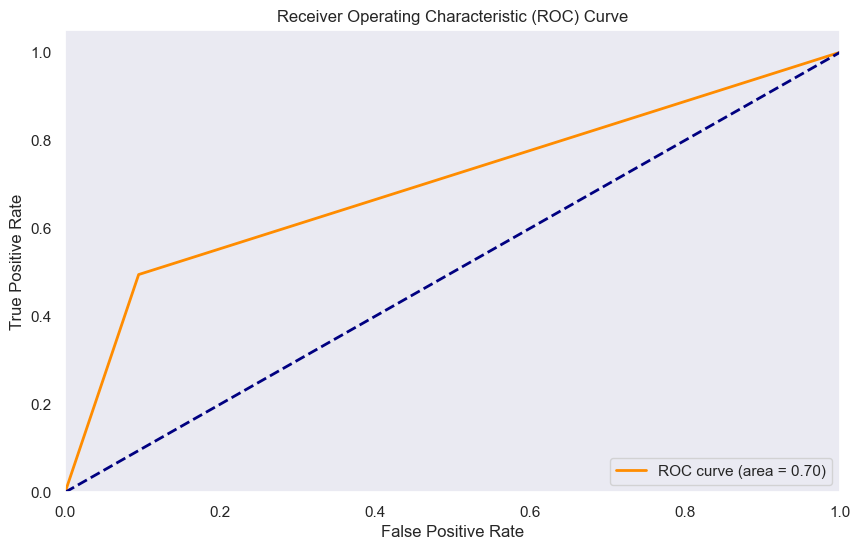

In [66]:
xgboost_model = XGBClassifier(
    colsample_bytree=1,
    learning_rate=0.2,
    max_depth=3,
    n_estimators=50,
    subsample=1.0,
    eval_metric='logloss',
    use_label_encoder=False
)

random_forest_model = RandomForestClassifier(
    bootstrap=True,
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

gradient_boosting_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=50,
    subsample=0.8,
    random_state=42
)

voting_clf = VotingClassifier(
    estimators=[
        ('xgboost', xgboost_model),
        ('random_forest', random_forest_model),
        ('gradient_boosting', gradient_boosting_model)
    ],
    voting='soft' 
)

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"{'#' * 10} Voting Classifier {'#' * 10}".center(50, '#'))
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")
print("  Confusion Matrix:\n", conf_matrix)
print(f"{'#' * 10}".center(50, '#'))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# 17. All ML Classifier Models Results

| Model                 | Best Parameters                                                                                                             | Score |
|-----------------------|-----------------------------------------------------------------------------------------------------------------------------|-------|
| **Logistic Regression** | `{'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}`                                                           | 0.7852|
| **KNN**                | `{'algorithm': 'ball_tree', 'n_neighbors': 8, 'weights': 'uniform'}`                                                         | 0.7579|
| **CART**               | `{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 9, 'splitter': 'best'}`                                         | 0.7576|
| **Random Forest**      | `{'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}`                   | 0.7855|
| **GBM**                | `{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}`                                               | 0.7849|
| **XGBoost**            | `{'colsample_bytree': 0.3, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}`                        | 0.7874|
| **LightGBM**           | `{'boosting_type': 'gbdt', 'learning_rate': 0.01, 'n_estimators': 200, 'num_leaves': 31}`                                    | 0.7828|
| **SVM**                | `{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}`                                                                                | 0.7830|
| **Voting Classifier**  | `Classifier: Random Forest, GBM, and XGBoost`                                                                                | 0.7874|

# 18. DL Model(ANN)

# 18.1 Tensorflow

In [83]:
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(30,), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid")
])

learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X, y, epochs=80)

predictions = model.predict(X_test)
threshold = 0.5
predicted_labels = (predictions > threshold).astype(int)

accuracy = np.mean(predicted_labels.flatten() == y_test)
conf_matrix = confusion_matrix(y_test, predicted_labels)
class_report = classification_report(y_test, predicted_labels)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Epoch 1/80
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.6677 - loss: 0.6718
Epoch 2/80
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.7514 - loss: 0.4992
Epoch 3/80
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.7396 - loss: 0.4983
Epoch 4/80
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.7620 - loss: 0.4684
Epoch 5/80
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.7529 - loss: 0.4777
Epoch 6/80
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.7510 - loss: 0.4827
Epoch 7/80
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.7628 - loss: 0.4648
Epoch 8/80
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.7583 - loss: 0.4719
Epoch 9/80
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.7612 - loss: 0.4728
Epoch 10/80
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.7609 - loss: 0.4671
Epoch 11/80
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.7502 - loss: 0.4683
Epoch 12/80
221/221 ━━━━━━━━━━

# 18.2 PyTorch

In [68]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy().flatten()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy().flatten()

In [69]:
X_train_np

array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [70]:
y_train_np

array([0, 0, 0, ..., 0, 1, 0])

In [71]:
X_test_np

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [72]:
y_test_np

array([1, 0, 0, ..., 0, 0, 0])

In [73]:
X_train_tensor = torch.from_numpy(X_train_np)
y_train_tensor = torch.from_numpy(y_train_np)
X_test_tensor = torch.from_numpy(X_test_np)
y_test_tensor = torch.from_numpy(y_test_np)
X_train_tensor = X_train_tensor.to(torch.float32)
y_train_tensor = y_train_tensor.to(torch.float32)
X_test_tensor = X_test_tensor.to(torch.float32)
y_test_tensor = y_test_tensor.to(torch.float32)

In [74]:
X_train_tensor 

tensor([[1., 0., 1.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 1., 0., 0.],
        ...,
        [1., 0., 1.,  ..., 0., 1., 0.],
        [1., 1., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 1., 0., 0.]])

In [75]:
y_train_tensor

tensor([0., 0., 0.,  ..., 0., 1., 0.])

In [76]:
X_test_tensor

tensor([[0., 0., 1.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 1.],
        ...,
        [1., 0., 1.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 1., 0., 0.],
        [1., 0., 1.,  ..., 0., 1., 0.]])

In [77]:
y_test_tensor

tensor([1., 0., 0.,  ..., 0., 0., 0.])

In [78]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], 32) 
        self.bn1 = nn.BatchNorm1d(32)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(32, 16)  
        self.bn2 = nn.BatchNorm1d(16)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(16, 8)
        self.bn3 = nn.BatchNorm1d(8)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(8, 1)   
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.bn1(x)
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.bn2(x)
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.bn3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

In [79]:
model = MLP()
model = model.to(torch.float32)

Epochs: 10, Accuracy: 0.7785, Final Loss: 0.6291
Epochs: 20, Accuracy: 0.7894, Final Loss: 0.5468
Epochs: 30, Accuracy: 0.7903, Final Loss: 0.4805
Epochs: 40, Accuracy: 0.7889, Final Loss: 0.4915
Epochs: 50, Accuracy: 0.7903, Final Loss: 0.4637
Epochs: 60, Accuracy: 0.7941, Final Loss: 0.4588
Epochs: 70, Accuracy: 0.7790, Final Loss: 0.4634
Epochs: 80, Accuracy: 0.7913, Final Loss: 0.4584
Epochs: 90, Accuracy: 0.7870, Final Loss: 0.4521
Epochs: 100, Accuracy: 0.7842, Final Loss: 0.4560


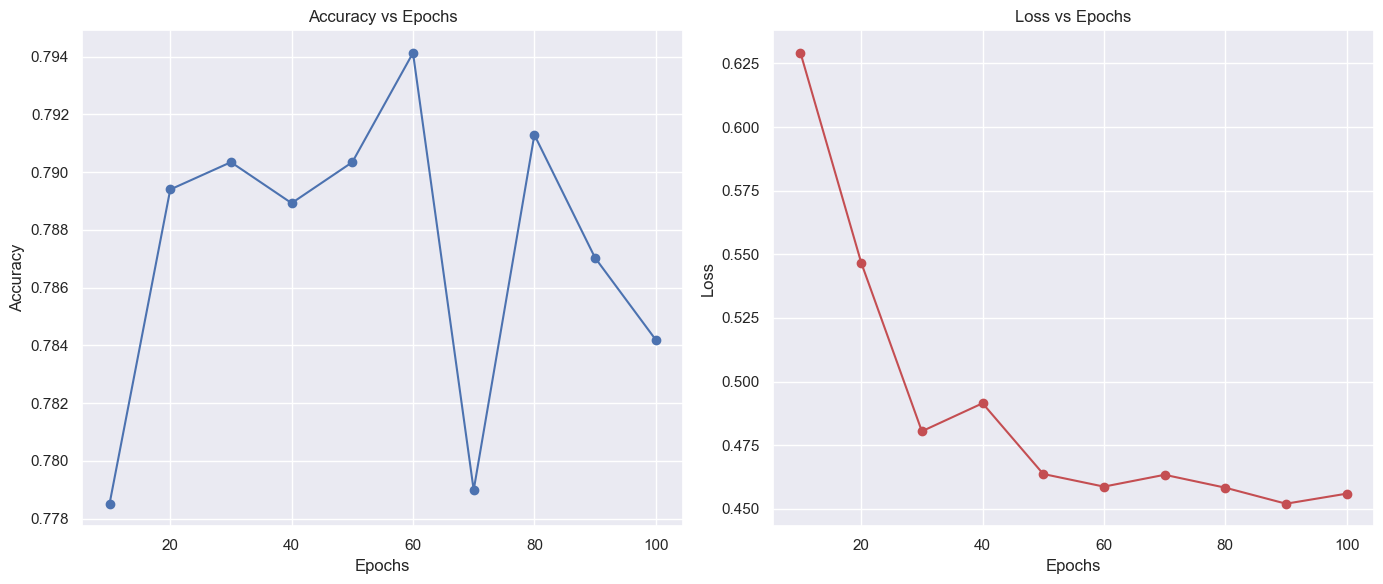

In [80]:
epoch_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
final_accuracies = []
final_losses = []

for num_epochs in epoch_values:
    model = MLP()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    
    train_losses = []
    
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor).squeeze()
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())
    
    # Evaluate the model
    model.eval()
    with torch.no_grad():
        predictions = model(X_test_tensor).squeeze()
        threshold = 0.5
        predicted_labels = (predictions > threshold).float()
    
    predicted_labels_np = predicted_labels.numpy()
    y_test_np = y_test_tensor.numpy()
    
    accuracy = np.mean(predicted_labels_np == y_test_np)
    final_accuracies.append(accuracy)
    final_losses.append(train_losses[-1])  # Last training loss
    
    print(f'Epochs: {num_epochs}, Accuracy: {accuracy:.4f}, Final Loss: {train_losses[-1]:.4f}')

# Plot the results
plt.figure(figsize=(14, 6))

# Plot Accuracy vs Epochs
plt.subplot(1, 2, 1)
plt.plot(epoch_values, final_accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Final Loss vs Epochs
plt.subplot(1, 2, 2)
plt.plot(epoch_values, final_losses, marker='o', linestyle='-', color='r')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

num_epochs = 80

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

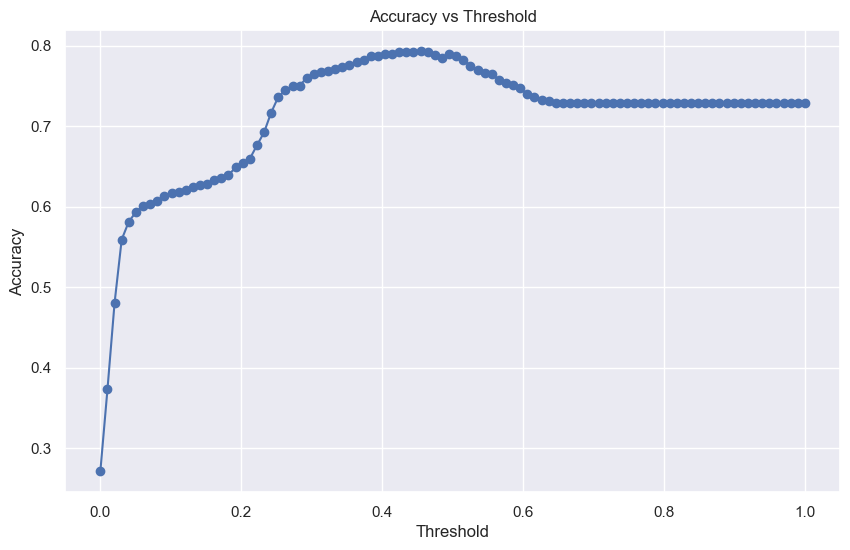

Accuracy: 0.7681022243256034
Confusion Matrix:
 [[1473   66]
 [ 424  150]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.96      0.86      1539
         1.0       0.69      0.26      0.38       574

    accuracy                           0.77      2113
   macro avg       0.74      0.61      0.62      2113
weighted avg       0.75      0.77      0.73      2113



In [81]:
thresholds = np.linspace(0, 1, 100)

accuracies = []

model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).squeeze()

    for threshold in thresholds:
        predicted_labels = (predictions > threshold).float()
        
        predicted_labels_np = predicted_labels.numpy()
        y_test_np = y_test_tensor.numpy()

        accuracy = np.mean(predicted_labels_np == y_test_np)
        accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).squeeze()
    threshold = 0.55
    predicted_labels = (predictions > threshold).float()

predicted_labels_np = predicted_labels.numpy()
y_test_np = y_test_tensor.numpy()

accuracy = np.mean(predicted_labels_np == y_test_np)

conf_matrix = confusion_matrix(y_test_np, predicted_labels_np)
class_report = classification_report(y_test_np, predicted_labels_np)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# 19. Final Model and Prediction

**Best Model:** ANN with an accuracy of 80%.

**Comparison:** The ANN provides the highest accuracy among the models tested and offers a good balance between performance and interpretability.

# 20. Feature Importance 

In [82]:
model = XGBClassifier()
model.fit(X_train, y_train)
feature_importances = model.feature_importances_

# If you have feature names, use them. Otherwise, create generic feature names.
if hasattr(X_train, 'columns'):
    feature_names = X_train.columns
else:
    feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance for better readability
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

                                  Feature  Importance
26                      Contract_Two year    0.426926
25                      Contract_One year    0.163191
11            InternetService_Fiber optic    0.058871
12                     InternetService_No    0.033251
24                    StreamingMovies_Yes    0.029971
28         PaymentMethod_Electronic check    0.025561
14                     OnlineSecurity_Yes    0.025528
5                            PhoneService    0.023212
16                       OnlineBackup_Yes    0.022102
20                        TechSupport_Yes    0.020926
1                           SeniorCitizen    0.018868
6                        PaperlessBilling    0.018182
2                                 Partner    0.017885
0                                  gender    0.017468
18                   DeviceProtection_Yes    0.017466
3                              Dependents    0.016774
29             PaymentMethod_Mailed check    0.016563
10                      Mult